In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import pickle

In [2]:
cols_to_load = [
    'TUACTDUR24',    # Durée de l'activité (en minutes)
    'ACTIVITY_NAME', # Nom de l'activité
    'TUSTARTTIM',    # Heure de début (format HH:MM:SS)
    'TUDIARYDAY'     # Jour de la semaine (1=dimanche, 7=samedi)
]
df = pd.read_csv("../Data/raw/atus_full_selected.csv", usecols=cols_to_load)

In [18]:
df.info(), df.describe(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583983 entries, 0 to 2583982
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   TUACTDUR24     int64 
 1   TUSTARTTIM     object
 2   ACTIVITY_NAME  object
 3   TUDIARYDAY     int64 
 4   START_MINUTES  int64 
 5   ACTIVITY_CODE  int32 
 6   DAY_OF_WEEK    int64 
 7   IS_WEEKEND     int32 
dtypes: int32(2), int64(4), object(2)
memory usage: 138.0+ MB


(None,
          TUACTDUR24    TUDIARYDAY  START_MINUTES  ACTIVITY_CODE   DAY_OF_WEEK  \
 count  2.583983e+06  2.583983e+06   2.583983e+06   2.583983e+06  2.583983e+06   
 mean   7.451903e+01  3.968667e+00   7.431565e+02   8.327171e+00  2.968667e+00   
 std    9.948129e+01  2.331607e+00   3.124131e+02   5.134389e+00  2.331607e+00   
 min    1.000000e+00  1.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
 25%    1.500000e+01  2.000000e+00   4.920000e+02   4.000000e+00  1.000000e+00   
 50%    3.000000e+01  4.000000e+00   7.300000e+02   8.000000e+00  3.000000e+00   
 75%    9.000000e+01  6.000000e+00   9.920000e+02   1.200000e+01  5.000000e+00   
 max    1.313000e+03  7.000000e+00   1.439000e+03   1.700000e+01  6.000000e+00   
 
          IS_WEEKEND  
 count  2.583983e+06  
 mean   3.417762e-01  
 std    4.743051e-01  
 min    0.000000e+00  
 25%    0.000000e+00  
 50%    0.000000e+00  
 75%    1.000000e+00  
 max    1.000000e+00  ,
    TUACTDUR24 TUSTARTTIM                    

In [3]:
#2. Nettoyage des données
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
print(df.isnull().sum())

TUACTDUR24       0
TUSTARTTIM       0
ACTIVITY_NAME    0
TUDIARYDAY       0
START_MINUTES    0
ACTIVITY_CODE    0
DAY_OF_WEEK      0
IS_WEEKEND       0
dtype: int64


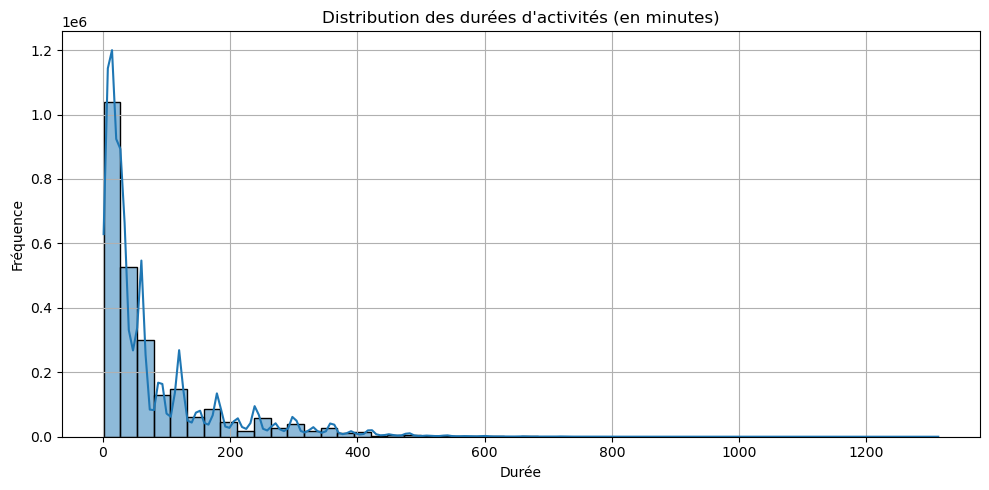

In [ ]:
# Visualisation : distribution des durées d'activité
plt.figure(figsize=(10, 5))
sns.histplot(df['TUACTDUR24'], bins=50, kde=True)
plt.title("Distribution des durées d'activités (en minutes)")
plt.xlabel("Durée")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 3. Conversion HH:MM:SS → minutes
def time_to_minutes(t):
    try:
        hh, mm, ss = map(int, t.split(':'))
        return hh * 60 + mm
    except:
        return 0  # Valeur par défaut

In [6]:
df['START_MINUTES'] = df['TUSTARTTIM'].apply(time_to_minutes)

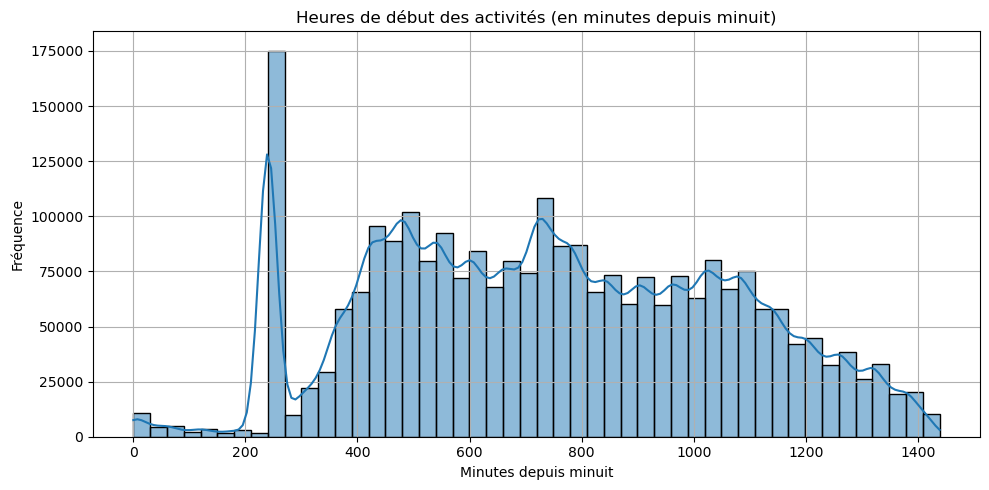

In [7]:
 #Visualisation : heures de début d'activité
plt.figure(figsize=(10, 5))
sns.histplot(df['START_MINUTES'], bins=48, kde=True)
plt.title("Heures de début des activités (en minutes depuis minuit)")
plt.xlabel("Minutes depuis minuit")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# 4. Encodage des activités
activity_encoder = LabelEncoder()
df['ACTIVITY_CODE'] = activity_encoder.fit_transform(df['ACTIVITY_NAME'])


C:\Windows\Temp\ipykernel_18680\1106713435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")


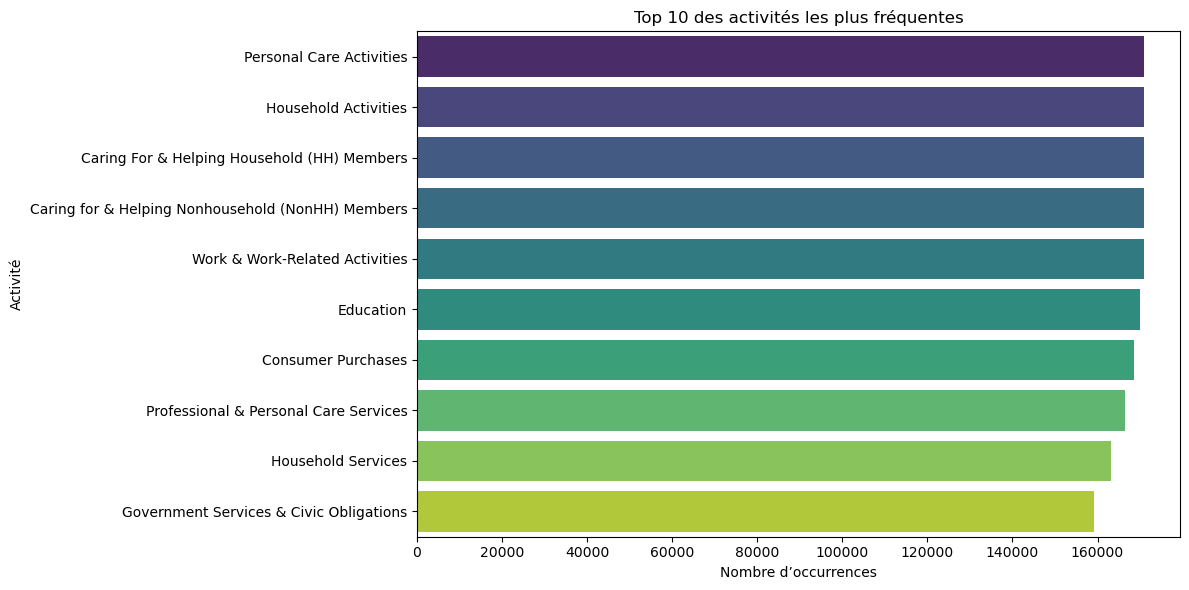

In [9]:
top_activities = df['ACTIVITY_NAME'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")
plt.title("Top 10 des activités les plus fréquentes")
plt.xlabel("Nombre d’occurrences")
plt.ylabel("Activité")
plt.tight_layout()
plt.show()

In [10]:
# 5. Transformation du jour de la semaine
df['DAY_OF_WEEK'] = df['TUDIARYDAY'] - 1  # 0=dimanche, 6=samedi
df['IS_WEEKEND'] = (df['DAY_OF_WEEK'] >= 5).astype(int)

C:\Windows\Temp\ipykernel_18680\3669627936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY_OF_WEEK', data=df, palette="pastel")


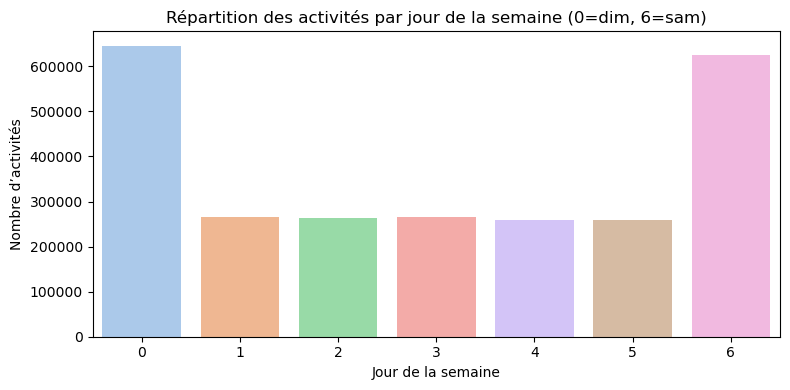

In [11]:
# Visualisation : répartition des jours
plt.figure(figsize=(8, 4))
sns.countplot(x='DAY_OF_WEEK', data=df, palette="pastel")
plt.title("Répartition des activités par jour de la semaine (0=dim, 6=sam)")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre d’activités")
plt.tight_layout()
plt.show()

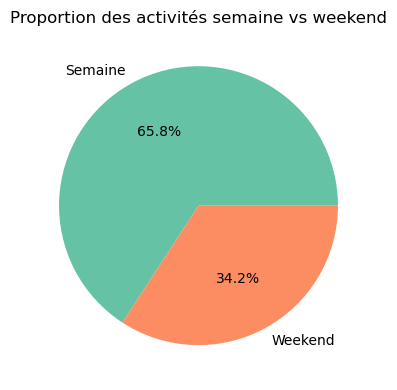

In [12]:
# Visualisation : proportion weekend/semaine
plt.figure(figsize=(6, 4))
df['IS_WEEKEND'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Semaine', 'Weekend'], colors=['#66c2a5', '#fc8d62'])
plt.title("Proportion des activités semaine vs weekend")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [13]:
# 6. Sélection finale des colonnes utiles
final_columns = [
    'ACTIVITY_CODE',
    'TUACTDUR24',
    'START_MINUTES',
    'DAY_OF_WEEK',
    'IS_WEEKEND'
]
final_df = df[final_columns]

In [14]:
# 7. Sauvegarde des données transformées
os.makedirs("../Data/processed", exist_ok=True)
final_df.to_csv("../Data/processed/cleaned_data.csv", index=False)

In [15]:
with open("../Data/processed/activity_encoder.pkl", "wb") as f:
    pickle.dump(activity_encoder, f)